# Analysis of AI and ML Job Listings in the USA


## Installation and Setup

In [55]:
# Standard libraries
import os
import zipfile
from datetime import datetime

# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud


In [1]:
!kaggle datasets download -d kanchana1990/ai-and-ml-job-listings-usa

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/ai-and-ml-job-listings-usa
License(s): ODC Attribution License (ODC-By)
 99%|█████████████████████████████████████▊| 1.00M/1.01M [00:00<00:00, 1.35MB/s]
100%|██████████████████████████████████████| 1.01M/1.01M [00:00<00:00, 1.36MB/s]


In [4]:
def unzip_file(zip_file):

    extract_to = os.path.dirname(os.path.abspath(zip_file))
    
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    
    os.remove(zip_file)
    
unzip_file("ai-and-ml-job-listings-usa.zip")

In [6]:
data = pd.read_csv("ai_ml_jobs_linkedin.csv")
data.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
3,Machine Learning Engineer (L4) - Infrastructur...,"Los Gatos, CA",2024-05-19,Netflix,At Netflix our goal is to entertain the world....,Over 200 applicants,Full-time,Not Applicable,Engineering and Information Technology,"Entertainment Providers, Technology, Informati..."
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting


## Data Exploration and Cleaning



In [11]:
data.shape

(862, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              862 non-null    object
 1   location           862 non-null    object
 2   publishedAt        850 non-null    object
 3   companyName        861 non-null    object
 4   description        862 non-null    object
 5   applicationsCount  862 non-null    object
 6   contractType       862 non-null    object
 7   experienceLevel    862 non-null    object
 8   workType           862 non-null    object
 9   sector             859 non-null    object
dtypes: object(10)
memory usage: 67.5+ KB


In [8]:
# Check for missing values
data.isnull().sum()

title                 0
location              0
publishedAt          12
companyName           1
description           0
applicationsCount     0
contractType          0
experienceLevel       0
workType              0
sector                3
dtype: int64

In [9]:
data[data.publishedAt.isnull()]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting
6,Junior Machine Learning Engineer,"Boulder, CO",NaN,HireMeFast LLC,This is a remote position.\n\nDISCLAIMER: This...,26 applicants,Full-time,Entry level,Information Technology,Software Development
31,Machine Learning Engineer (NLP),"San Francisco, CA",NaN,Writesonic,[Full Time] Machine Learning Engineer (NLP) at...,43 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
33,Founding Engineer (AI/ML),United States,NaN,Meetsta,About Meetsta: Meetsta is a dynamic and innova...,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
271,Machine Learning Engineer,New York City Metropolitan Area,NaN,"Tribal Tech - The Digital, Data & AI Specialists",About the Role\n\nMy client is an engineering-...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Financial Services and Software Development
331,Machine Learning Engineer,"Chicago, IL",NaN,Motion Recruitment Partners LLC,We're looking for a Machine Learning Enigneer ...,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
348,AI/ML Engineer(Remote),United States,NaN,NaN,THE OPPORTUNITY\n\n\n\n\nWesper is looking for...,112 applicants,Full-time,Entry level,Engineering and Information Technology,Outsourcing and Offshoring Consulting
448,Machine Learning Engineer,"McLean, VA",NaN,"BYTE Systems, LLC",Candidate MUST possess a TS/SCI clearance with...,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Information Technology & Services
466,AI Engineer,United States,NaN,Entelligence.AI,Company Description\n\n\n\n\nAt Entelligence.a...,118 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development


In [12]:
data[data.companyName.isnull()]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
348,AI/ML Engineer(Remote),United States,NaN,NaN,THE OPPORTUNITY\n\n\n\n\nWesper is looking for...,112 applicants,Full-time,Entry level,Engineering and Information Technology,Outsourcing and Offshoring Consulting


In [14]:
data['companyName'].fillna('Unknown Company', inplace=True)

In [13]:
data[data.sector.isnull()]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
281,Software Engineer (ML),United States,2024-05-31,Hop Labs,THE COMPANY\n\nHop Labs works with organizatio...,118 applicants,Full-time,Entry level,Software Development,NaN
399,"Machine Learning Engineer, Medical Imaging","Indianapolis, IN",2024-04-29,Stealth Startup,"Machine Learning Engineer, Medical Imaging\n\n...",Over 200 applicants,Full-time,Entry level,"Technology, Information and Internet",NaN
746,Machine Learning Scientist,"Pittsburgh, PA",2024-05-20,NOMA AI,NOMA is developing a novel AI platform for hea...,Over 200 applicants,Full-time,Mid-Senior level,Hospitals and Health Care,NaN


In [15]:
data['sector'].fillna('Unknown Sector', inplace=True)

In [17]:
# Check for duplicates
data[data.duplicated(keep=False)]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
343,Full-Stack Engineer (with ML/AI Exposure),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About Us:\n\nWe are a dynamic startup committe...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
356,Full-Stack Engineer with ML/AI Experience,"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About the Company:\n\nWe are an innovative tec...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
371,Senior ML Operations Engineer (MLOps),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",Company Overview: Welcome to the forefront of ...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
376,Senior ML Operations Engineer (MLOps),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",Company Overview: Welcome to the forefront of ...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
385,Full-Stack Engineer (with ML/AI Exposure),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About Us:\n\nWe are a dynamic startup committe...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
398,Full-Stack Engineer with ML/AI Experience,"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About the Company:\n\nWe are an innovative tec...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...


In [18]:
# Drop duplicate rows and reset index
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [19]:
# Export cleaned data for Tableau
data.to_csv('cleaned_data.csv', index=False)

## Exploratory Data Analysis (EDA)


In [34]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
3,Machine Learning Engineer (L4) - Infrastructur...,"Los Gatos, CA",2024-05-19,Netflix,At Netflix our goal is to entertain the world....,Over 200 applicants,Full-time,Not Applicable,Engineering and Information Technology,"Entertainment Providers, Technology, Informati..."
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting


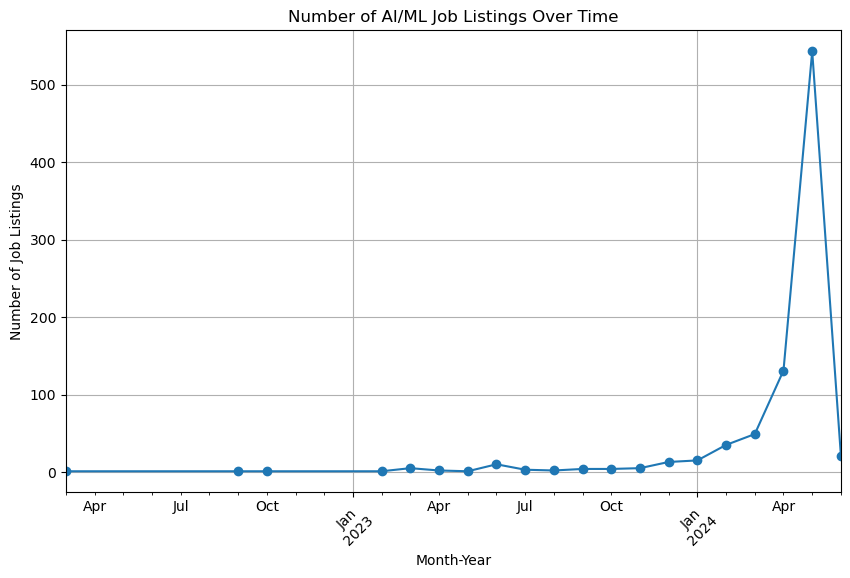

In [36]:
# Convert 'publishedAt' to datetime
data['publishedAt'] = pd.to_datetime(data['publishedAt'], errors='coerce')

# 1. Number of Jobs and Publish Date to Know Seasonal Trends
plt.figure(figsize=(10, 6))
data['month_year'] = data['publishedAt'].dt.to_period('M')
job_counts_by_month = data['month_year'].value_counts().sort_index()
job_counts_by_month.plot(kind='line', marker='o')
plt.title('Number of AI/ML Job Listings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

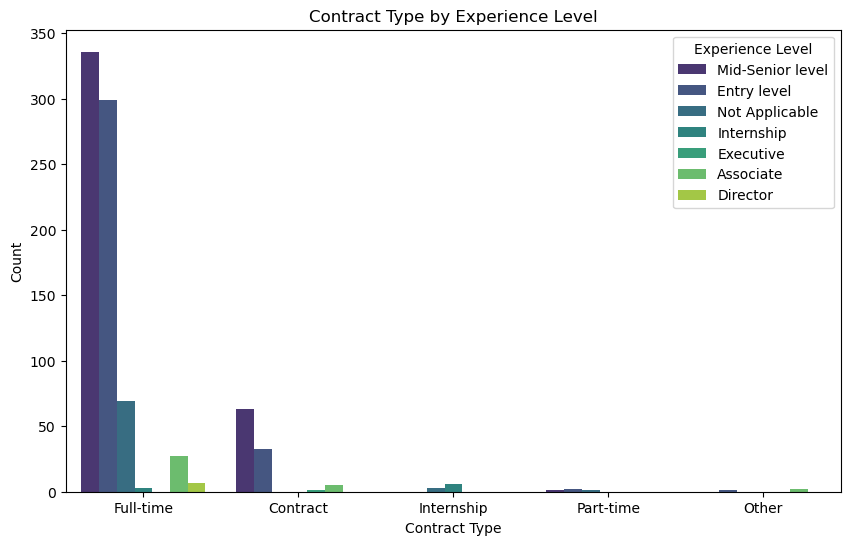

In [37]:
# 2. Bar Chart: `contractType` by `experienceLevel`
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contractType', hue='experienceLevel', palette='viridis')
plt.title('Contract Type by Experience Level')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Experience Level', loc='upper right')
plt.show()

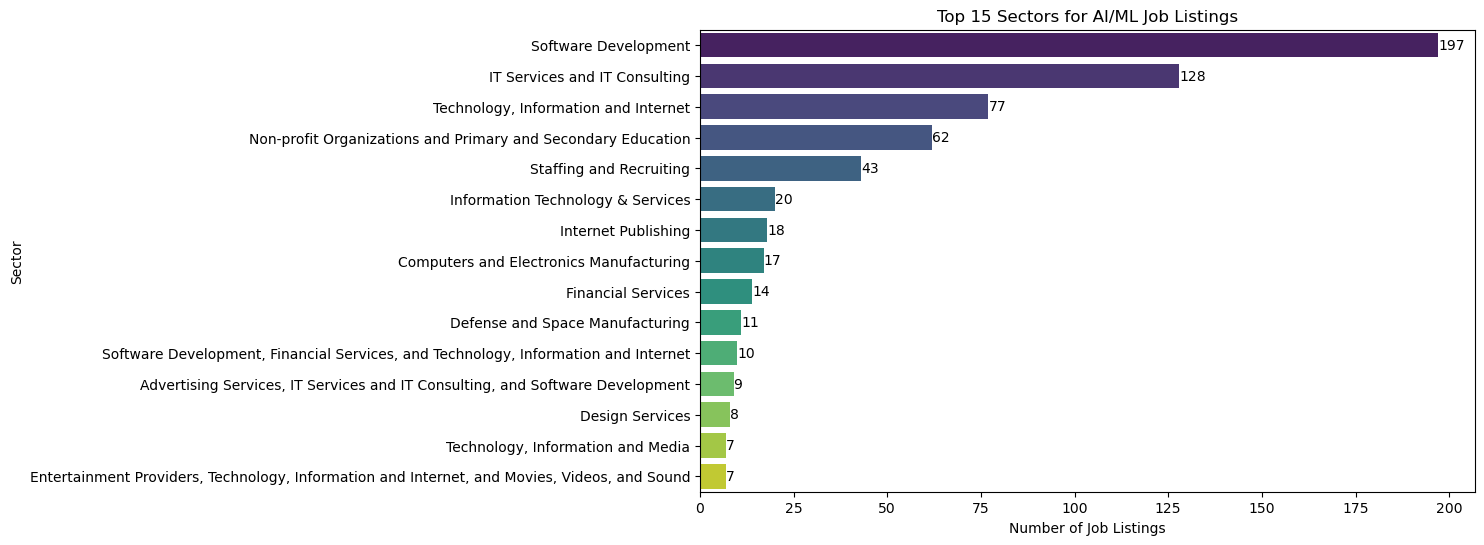

In [54]:
# 3. Top 10 Sectors with Labels
plt.figure(figsize=(10, 6))
top_15_sectors = data['sector'].value_counts().head(15)
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='viridis')
plt.title('Top 15 Sectors for AI/ML Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Sector')
# Add labels on bars
for index, value in enumerate(top_15_sectors.values):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.show()


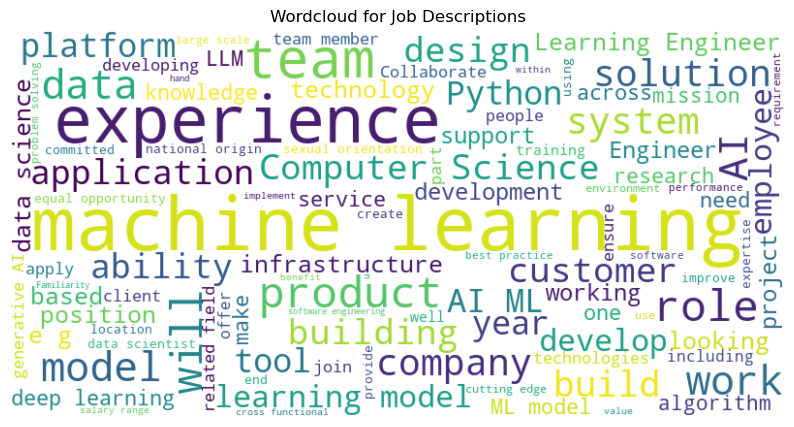

In [57]:
# 4. Wordcloud for Job Descriptions
text = " ".join(description for description in data.description)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Job Descriptions')
plt.show()

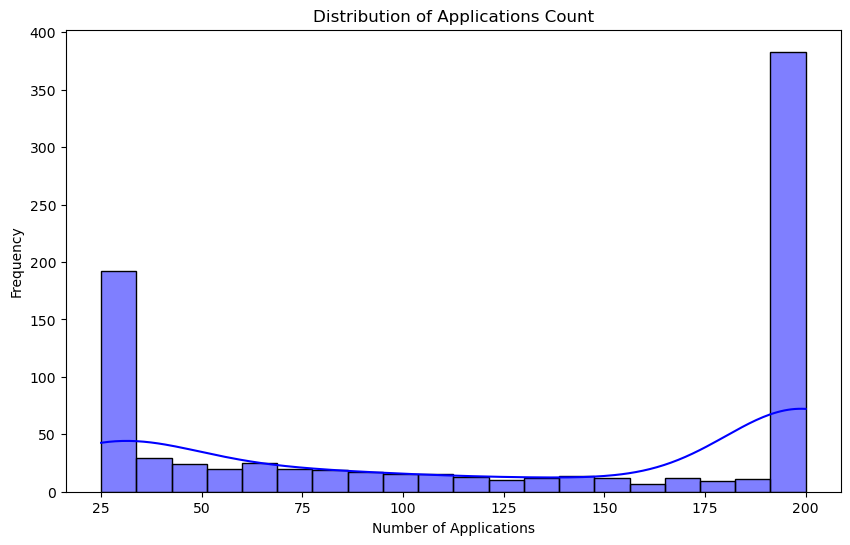

In [47]:
# 5. Bar Chart for `applicationsCount`

# Extract numbers and convert to int
data['applicationsCount_int'] = data['applicationsCount'].str.extract('(\d+)').astype(int)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['applicationsCount_int'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Applications Count')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.show()

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Neural Network Model
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn ** 0.5
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nNeural Network Model Performance:")
print(f"MAE: {mae_nn}")
print(f"MSE: {mse_nn}")
print(f"RMSE: {rmse_nn}")
print(f"R²: {r2_nn}")


1132/1132 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step

Neural Network Model Performance:
MAE: 83574.96818284638
MSE: 11338969794.843891
RMSE: 106484.59886220115
R²: 0.6255153255428116


In [88]:
# Random Forest Regressor with Randomized Search
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=42)
rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Model Performance:")
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")


Random Forest Model Performance:
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
MAE: 35900.535666533615
MSE: 2605421546.729932
RMSE: 51043.33009052144
R²: 0.9139524615195136


In [89]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print(f"\nGradient Boosting Model Performance:")
print(f"Best Parameters: {gb_grid_search.best_params_}")
print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"RMSE: {rmse_gb}")
print(f"R²: {r2_gb}")


Gradient Boosting Model Performance:
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
MAE: 48223.6165194804
MSE: 3988586211.4655333
RMSE: 63155.25482068403
R²: 0.8682715946889367


In [91]:
# Define the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
best_tree_model = grid_search.best_estimator_

# Make predictions
y_pred_tree = best_tree_model.predict(X_test)

# Evaluate model performance
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

print(f"\nDecision Tree Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE: {mae_tree}")
print(f"MSE: {mse_tree}")
print(f"RMSE: {rmse_tree}")
print(f"R²: {r2_tree}")



Decision Tree Model Performance:
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}
MAE: 38713.01661466562
MSE: 3108936452.118388
RMSE: 55757.83758466955
R²: 0.8973232069363961


In [95]:
# Define the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Define hyperparameters to tune
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Best estimator
best_xgb_model = xgb_grid_search.best_estimator_

# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate model performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Model Performance:")
print(f"Best Parameters: {xgb_grid_search.best_params_}")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R²: {r2_xgb}")


XGBoost Model Performance:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
MAE: 48072.691543013534
MSE: 3945042601.333911
RMSE: 62809.57412157729
R²: 0.8697096807725813


In [97]:
# XGBoost Model Performance
print(f"\nXGBoost Model Performance:")
print(f"Best Parameters: {xgb_grid_search.best_params_}")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R²: {r2_xgb}")

# Collect all metrics for comparison
results = {
    "Model": ["Polynomial Regression", "Neural Network", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"],
    "MAE": [mae_poly, mae_nn, mae_tree, mae_rf, mae_gb, mae_xgb],
    "MSE": [mse_poly, mse_nn, mse_tree, mse_rf, mse_gb, mse_xgb],
    "RMSE": [rmse_poly, rmse_nn, rmse_tree, rmse_rf, rmse_gb, rmse_xgb],
    "R²": [r2_poly, r2_nn, r2_tree, r2_rf, r2_gb, r2_xgb]
}

results_df = pd.DataFrame(results)

print("\nComparison of Model Performance:")
results_df


XGBoost Model Performance:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
MAE: 48072.691543013534
MSE: 3945042601.333911
RMSE: 62809.57412157729
R²: 0.8697096807725813

Comparison of Model Performance:


,Model,MAE,MSE,RMSE,R²
0,Polynomial Regression,69549.279263,8.406965e+09,91689.502548,0.722349
1,Neural Network,83574.968183,1.133897e+10,106484.598862,0.625515
2,Decision Tree,38713.016615,3.108936e+09,55757.837585,0.897323
3,Random Forest,35900.535667,2.605422e+09,51043.330091,0.913952
4,Gradient Boosting,48223.616519,3.988586e+09,63155.254821,0.868272
5,XGBoost,48072.691543,3.945043e+09,62809.574122,0.869710
